In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
#importing data
df = pd.read_csv(r"../data/processed/df.csv")

In [124]:
df.columns

Index(['cook', 'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'fav_food', 'fruit_day', 'income',
       'mother_education', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'sports', 'veggies_day'],
      dtype='object')

In [142]:
#too many columns, we should use PCA to reduce the number of columns
pca = PCA(n_components=4)
pca.fit(df)
df_pca = pca.transform(df)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])

In [149]:
# define a function to plot the cluster giving the number of clusters
def plot_kmeans_clustering(df,n_clusters, x, y):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df)
    y_kmeans = kmeans.predict(df)
    random_data = np.random.uniform(low=-0.3, high=0.3, size=(len(df[x]), 2))
    random_df = pd.DataFrame(random_data, columns=['x', 'y'])
    plt.scatter(df[x]+random_df['x'], df[y]+random_df['y'], c=y_kmeans, s=50, cmap='viridis', alpha=0.8)
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    for i in range(n_clusters):
        print(f'Cluster {i+1} has {sum(y_kmeans==i)} members')
    print(f'The inertia for n_clusters={n_clusters} is : {kmeans.inertia_}')
    plt.show()

#labels=["cook" , "eating_out", "employment","ethnic_food","exercise","fruit_day", "income","on_off_campus" ,"pay_meal_out", "sports","veggies_day"]

Cluster 1 has 101 members
Cluster 2 has 24 members
The inertia for n_clusters=2 is : 772.6835731441321


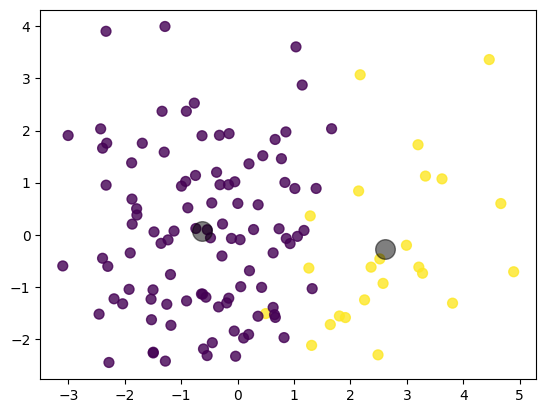

Cluster 1 has 57 members
Cluster 2 has 25 members
Cluster 3 has 43 members
The inertia for n_clusters=3 is : 609.5206553045767


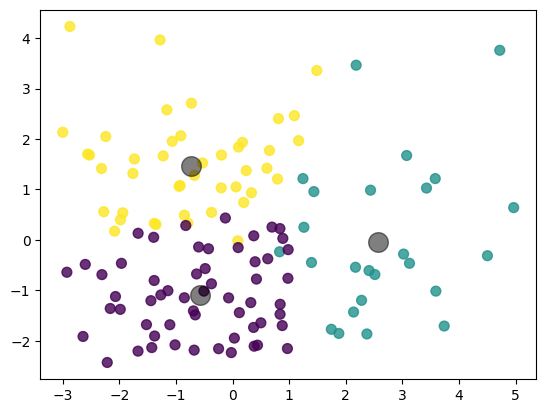

Cluster 1 has 46 members
Cluster 2 has 21 members
Cluster 3 has 30 members
Cluster 4 has 28 members
The inertia for n_clusters=4 is : 534.4273097796821


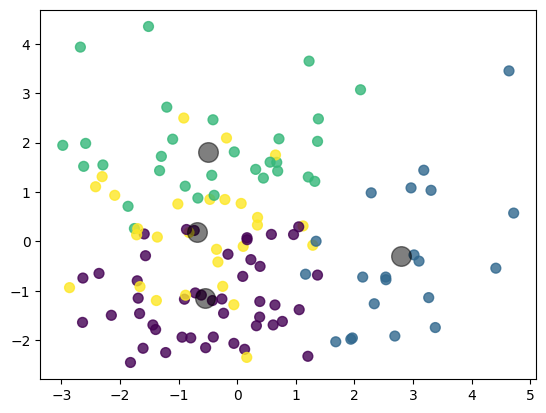

Cluster 1 has 24 members
Cluster 2 has 22 members
Cluster 3 has 20 members
Cluster 4 has 25 members
Cluster 5 has 34 members
The inertia for n_clusters=5 is : 493.87418446430064


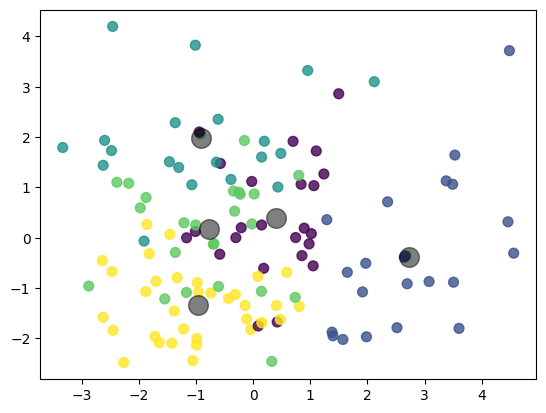

Cluster 1 has 30 members
Cluster 2 has 11 members
Cluster 3 has 11 members
Cluster 4 has 21 members
Cluster 5 has 26 members
Cluster 6 has 26 members
The inertia for n_clusters=6 is : 430.07585631065984


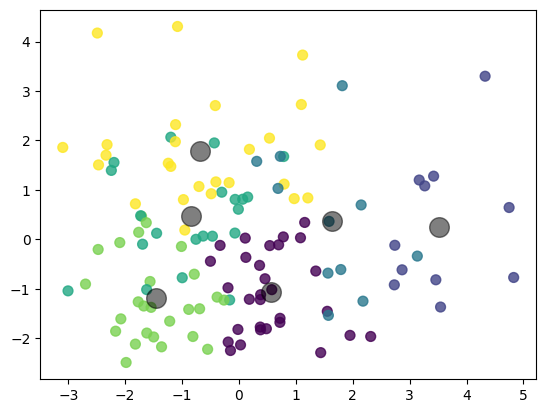

In [150]:
#Run the previous function on diffent numbers of clusters to find the best number of clusters
for i in range(2, 7):
    plot_kmeans_clustering(df_pca, n_clusters=i, x='PC1', y='PC2')
    print('=====================================')

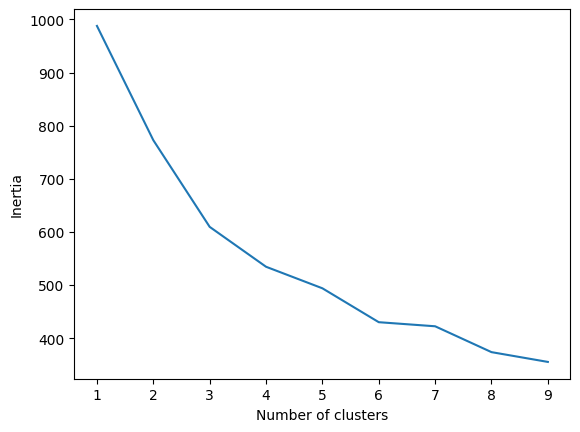

[987.771327702231,
 772.6835731441321,
 609.5206553045767,
 534.4273097796821,
 493.87418446430064,
 430.07585631065984,
 422.390657302855,
 373.7187115153263,
 355.29396475416115]

In [147]:
#Find the optimal k via elbow method
def find_optimal_k(df, k_range):
    inertia = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df)
        inertia.append(kmeans.inertia_)
    plt.plot(k_range, inertia)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()
    return inertia

find_optimal_k(df_pca, range(1, 10))

In [152]:
#The optimal number of clusters is 3
#We can now run the kmeans algorithm with 3 clusters
kmeans = KMeans(n_clusters = 3, random_state=42)
kmeans.fit(df)
kmeans.predict(df)

array([2, 0, 0, 0, 0, 1, 0, 2, 2, 0, 1, 0, 2, 0, 0, 2, 1, 0, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 2, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 1, 2, 0, 1, 2,
       0, 0, 0, 2, 1, 0, 0, 2, 1, 0, 2, 2, 0, 0, 2, 2, 2, 1, 0, 2, 0, 2,
       1, 1, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 2, 2,
       2, 2, 0, 2, 2, 2, 1, 1, 1, 0, 0, 1, 1, 2, 2])